# What is a linear model?

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.datasets import make_regression, make_circles
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import warnings
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

plt.xkcd()

Fonction like $wx+b$

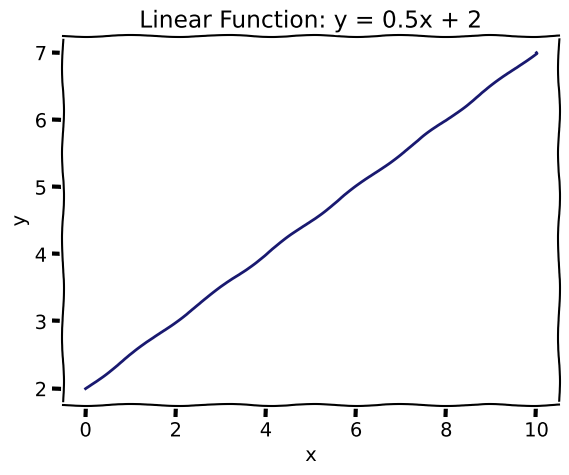

In [7]:
# Function setup
x = np.linspace(0, 10, 200)
w = 0.5
b = 2
y = w * x + b

# Plot function
plt.plot(x, y, c='midnightblue', label='y = wx + b')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Linear Function: y = {w}x + {b}')
plt.show()

Can be extended at 3 dimensions: $w_1x_1 + w_2x_2 + b$

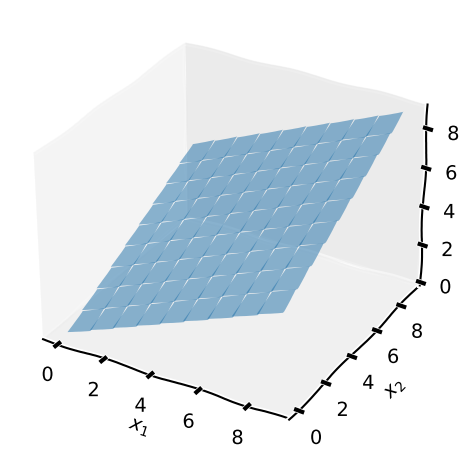

In [8]:
fig = plt.figure() # creates a new figure window
ax = fig.add_subplot(111, projection='3d') # adds one subplot to the figur (1 row, 1 column, 1 plot)

xx1, xx2 = np.meshgrid(range(10), range(10)) # np.meshgrid  takes 1D arrays and produces 2D matrices corresponding to all pairs of (x1, x2) in the two arrays.
w_1 = 0.5
w_2 = 0.5
b = 0

z = w_1 * xx1 + w_2 * xx2 + b

# Plot the surface
ax.plot_surface(xx1, xx2, z, alpha=0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
plt.tight_layout()
plt.show()

Even in high dimension, problem can be linear

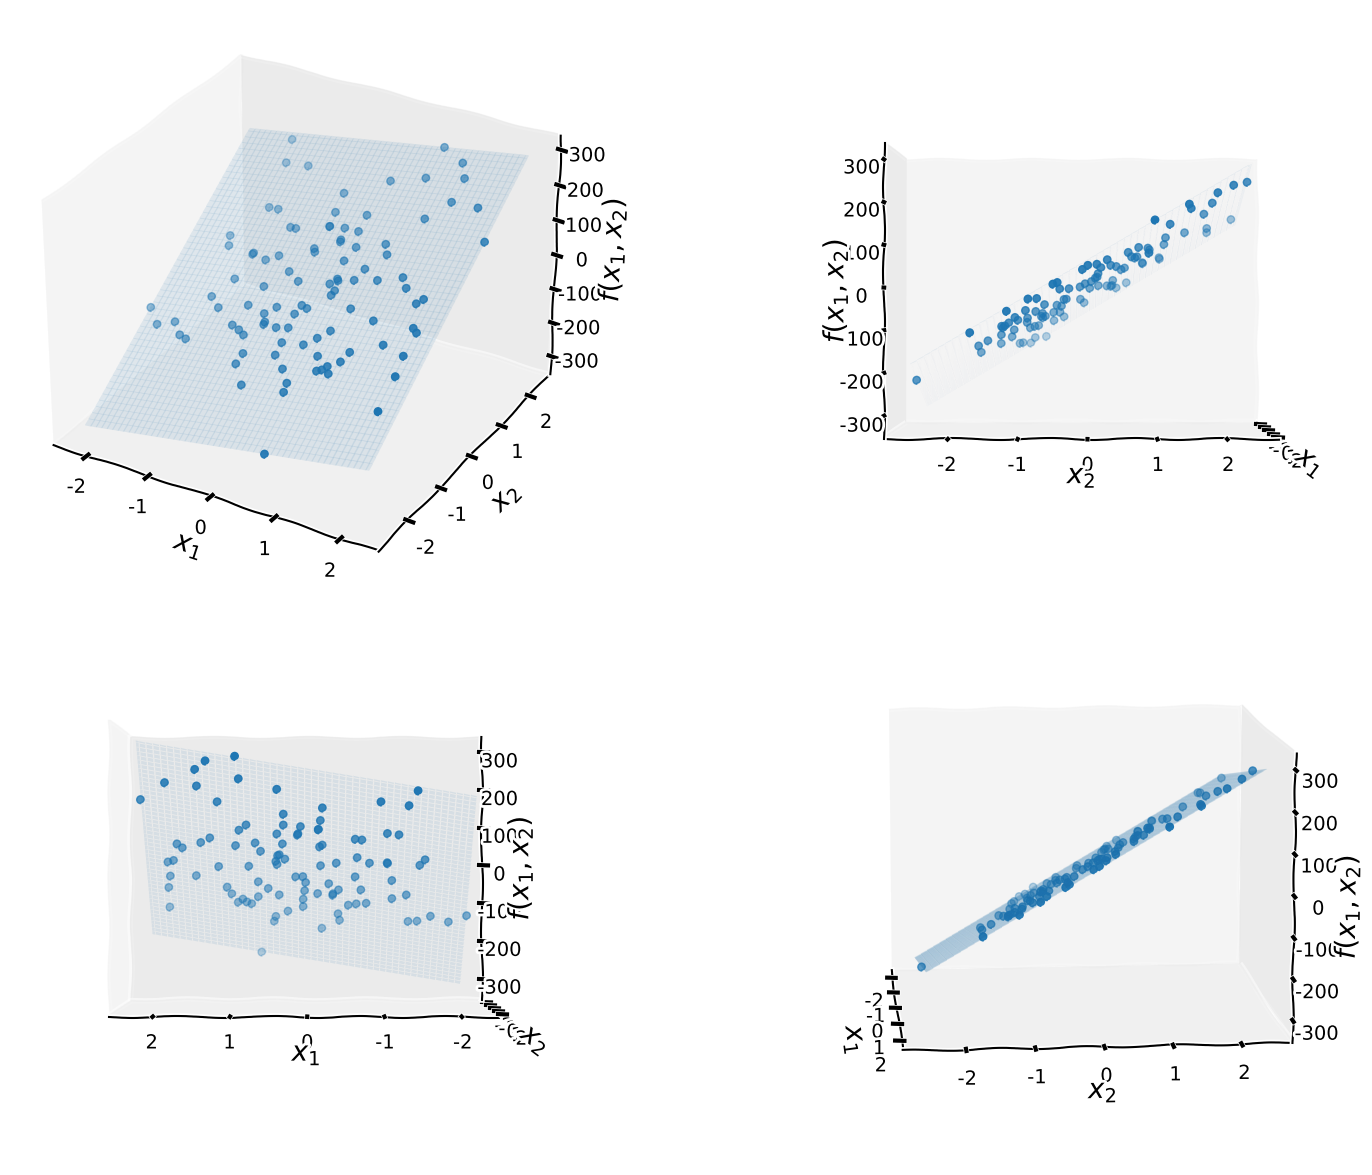

In [9]:
np.random.seed(0)
m = 100
X, y = make_regression(n_samples=m, n_features=2)

model = LinearRegression().fit(X, y)
coefs = model.coef_
bias = model.intercept_

xx1, xx2 = np.meshgrid(np.linspace(X[:, 0].min(),X[:, 0].max(), 100),
                       np.linspace(X[:, 1].min(),X[:, 1].max(), 100))
z = coefs[0] * xx1 + coefs[1] * xx2 + bias

fontsize = 20
fig = plt.figure(figsize=(20, 15))

ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot_surface(xx1, xx2, z, alpha=0.1)
ax.scatter3D(X[:, 0], X[:, 1], y)
ax.set_xlabel('$x_1$', fontsize=fontsize)
ax.set_ylabel('$x_2$', fontsize=fontsize)
ax.set_zlabel('$f(x_1, x_2)$', fontsize=fontsize)

# reduce space between subplots
plt.subplots_adjust(wspace=0., hspace=0.)

angles = [0, 90, -5]
elev = [0, 0, 10]
for i in range(len(angles)):
  ax = fig.add_subplot(2, 2, i+2,projection='3d')
  ax.scatter3D(X[:, 0], X[:, 1], y)
  ax.plot_surface(xx1, xx2, z, alpha=0.1)
  ax.set_xlabel('$x_1$', fontsize=fontsize)
  ax.set_ylabel('$x_2$', fontsize=fontsize)
  ax.set_zlabel('$f(x_1, x_2)$', fontsize=fontsize)
  ax.view_init(elev[i], angles[i])

plt.show()

Even if our data are non-linear, we can transform them to be linear

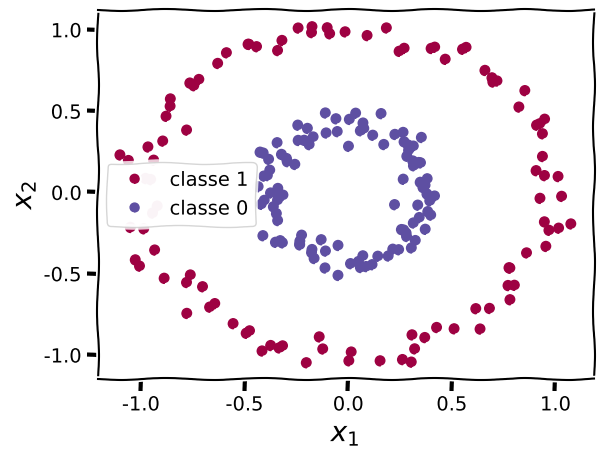

In [10]:
X, y = make_circles(n_samples=200, noise=0.05, factor=0.4, random_state=0)
ax = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral')
plt.xlabel('$x_1$', fontsize=fontsize)
plt.ylabel('$x_2$', fontsize=fontsize)
plt.legend(ax.legend_elements()[0], ('classe 1', 'classe 0'))
plt.show()

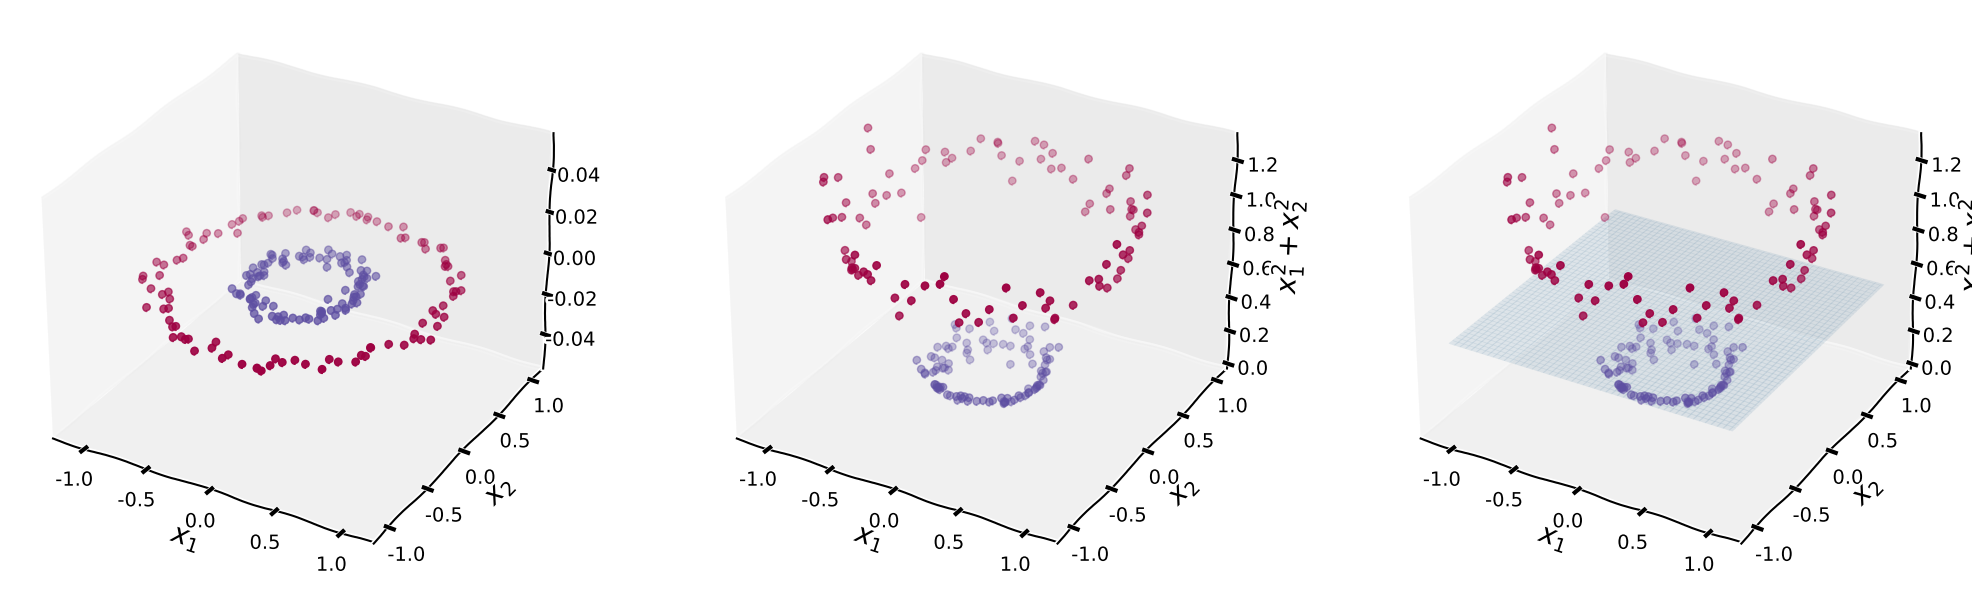

In [11]:
X, y = make_circles(n_samples=200, noise=0.05, factor=0.4, random_state=0)
# X = PolynomialFeatures(2).fit_transform(X)

Z = X[:, 0]**2 + X[:, 1]**2
fontsize = 20
fig = plt.figure(figsize=(25, 8))

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], 0, c=y, cmap='Spectral')
ax.set_xlabel('$x_1$', fontsize=fontsize)
ax.set_ylabel('$x_2$', fontsize=fontsize)

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], Z, c=y, cmap='Spectral')
ax.set_xlabel('$x_1$', fontsize=fontsize)
ax.set_ylabel('$x_2$', fontsize=fontsize)
ax.set_zlabel('$x_1^2 + x_2^2$', fontsize=fontsize)

xx1, xx2 = np.meshgrid(np.linspace(X[:, 0].min(),X[:, 0].max(), 100),
                       np.linspace(X[:, 1].min(),X[:, 1].max(), 100))

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], Z, c=y, cmap='Spectral')
Z = (xx1 + xx2) * 0 + 0.5

ax.plot_surface(X = xx1, Y = xx2, Z = Z, alpha=0.1)
ax.set_xlabel('$x_1$', fontsize=fontsize)
ax.set_ylabel('$x_2$', fontsize=fontsize)
ax.set_zlabel('$x_1^2 + x_2^2$', fontsize=fontsize)
plt.show()